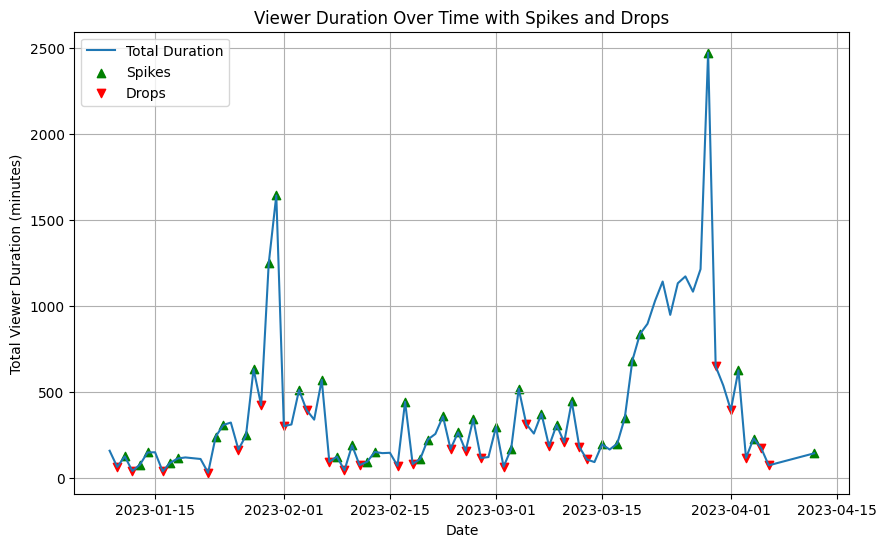

Spikes:
          date  total_duration  pct_change
2   2023-01-11             124   96.825397
4   2023-01-13              76   94.871795
5   2023-01-14             147   93.421053
8   2023-01-17              87  135.135135
9   2023-01-18             112   28.735632
13  2023-01-23             239  724.137931
14  2023-01-24             307   28.451883
17  2023-01-27             246   50.000000
18  2023-01-28             632  156.910569
20  2023-01-30            1247  195.497630
21  2023-01-31            1643   31.756215
24  2023-02-03             510   64.516129
27  2023-02-06             569   68.343195
29  2023-02-08             123   32.258065
31  2023-02-10             188  337.209302
33  2023-02-12              93   27.397260
34  2023-02-13             150   61.290323
38  2023-02-17             442  540.579710
40  2023-02-19             109   36.250000
41  2023-02-20             222  103.669725
43  2023-02-22             357   40.000000
45  2023-02-24             264   58.083832
47 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load datasets
dim_events = pd.read_csv("dim_events.csv")
fact_viewers = pd.read_csv("Fact_viewrs.csv")

# Convert date columns to datetime
fact_viewers['view_time'] = pd.to_datetime(fact_viewers['view_time'])

# Group data by date and calculate total viewer duration
viewers_duration = fact_viewers.groupby(fact_viewers['view_time'].dt.date)['duration_minutes'].sum().reset_index()
viewers_duration.rename(columns={"view_time": "date", "duration_minutes": "total_duration"}, inplace=True)

# Calculate percentage change
viewers_duration['pct_change'] = viewers_duration['total_duration'].pct_change() * 100

# Identify spikes and drops
spikes = viewers_duration[viewers_duration['pct_change'] > 20]  # Spike threshold: 20% increase
drops = viewers_duration[viewers_duration['pct_change'] < -20]  # Drop threshold: 20% decrease

# Plot the metric over time
plt.figure(figsize=(10, 6))
plt.plot(viewers_duration['date'], viewers_duration['total_duration'], label='Total Duration')
plt.scatter(spikes['date'], spikes['total_duration'], color='green', label='Spikes', marker='^')
plt.scatter(drops['date'], drops['total_duration'], color='red', label='Drops', marker='v')
plt.xlabel('Date')
plt.ylabel('Total Viewer Duration (minutes)')
plt.title('Viewer Duration Over Time with Spikes and Drops')
plt.legend()
plt.grid()
plt.show()

# Output spikes and drops
print("Spikes:")
print(spikes)
print("\nDrops:")
print(drops)
